# DATA DESCRIPTION

In [59]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/BBC News.csv')

In [3]:
df.head()

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

In [4]:
df.info

<bound method DataFrame.info of       ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  
0          business  
1          business  
2          business  
3              tech  
4          busine

In [5]:
df.shape

(1490, 3)

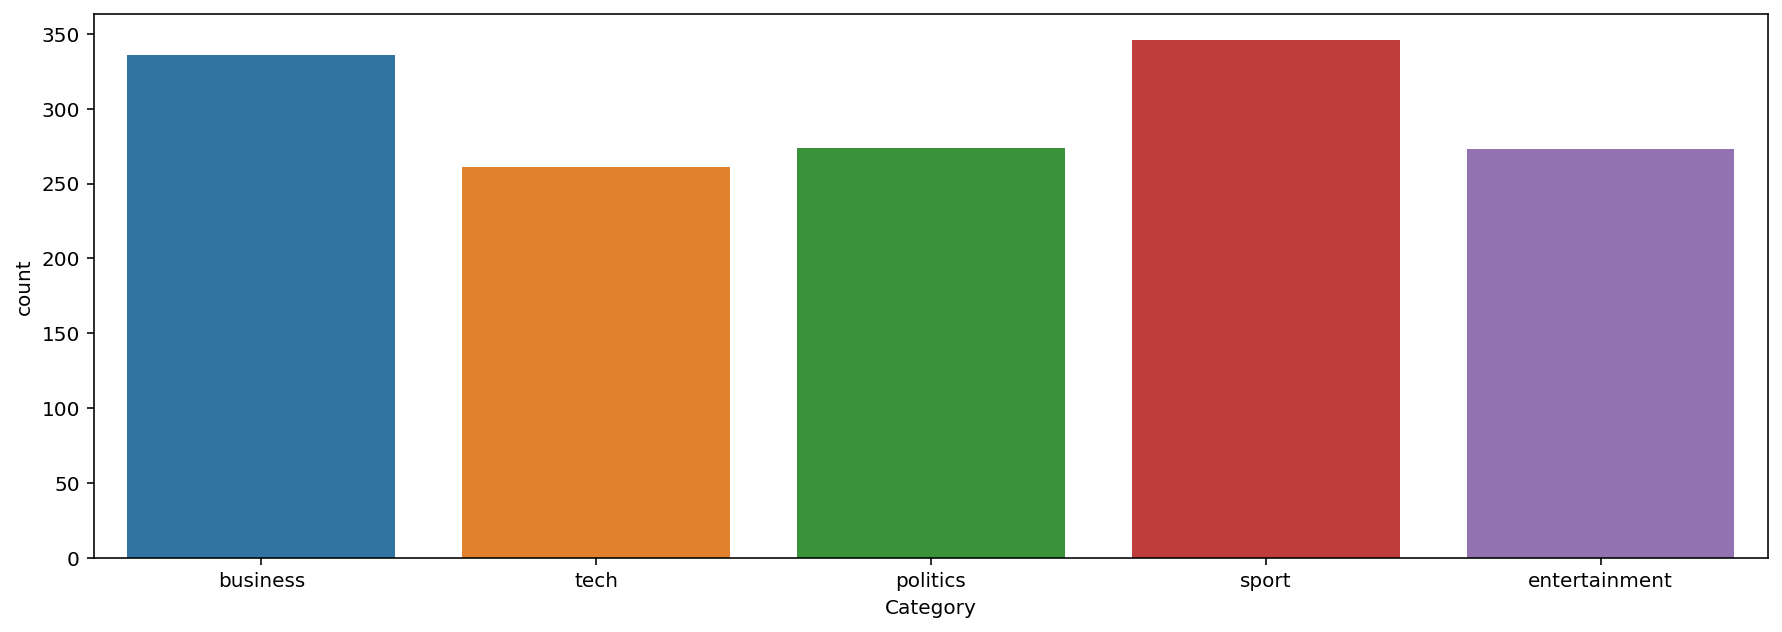

In [6]:
plt.figure(figsize=(15, 5))
sns.countplot(df.Category)

In [7]:
df['News_length'] = df['Text'].str.len()
print(df['News_length'])

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64


In [8]:
df.head()

ArticleId                                               Text  Category  \
0       1833  worldcom ex-boss launches defence lawyers defe...  business   
1        154  german business confidence slides german busin...  business   
2       1101  bbc poll indicates economic gloom citizens in ...  business   
3       1976  lifestyle  governs mobile choice  faster  bett...      tech   
4        917  enron bosses in $168m payout eighteen former e...  business   

   News_length  
0         1866  
1         2016  
2         3104  
3         3618  
4         2190

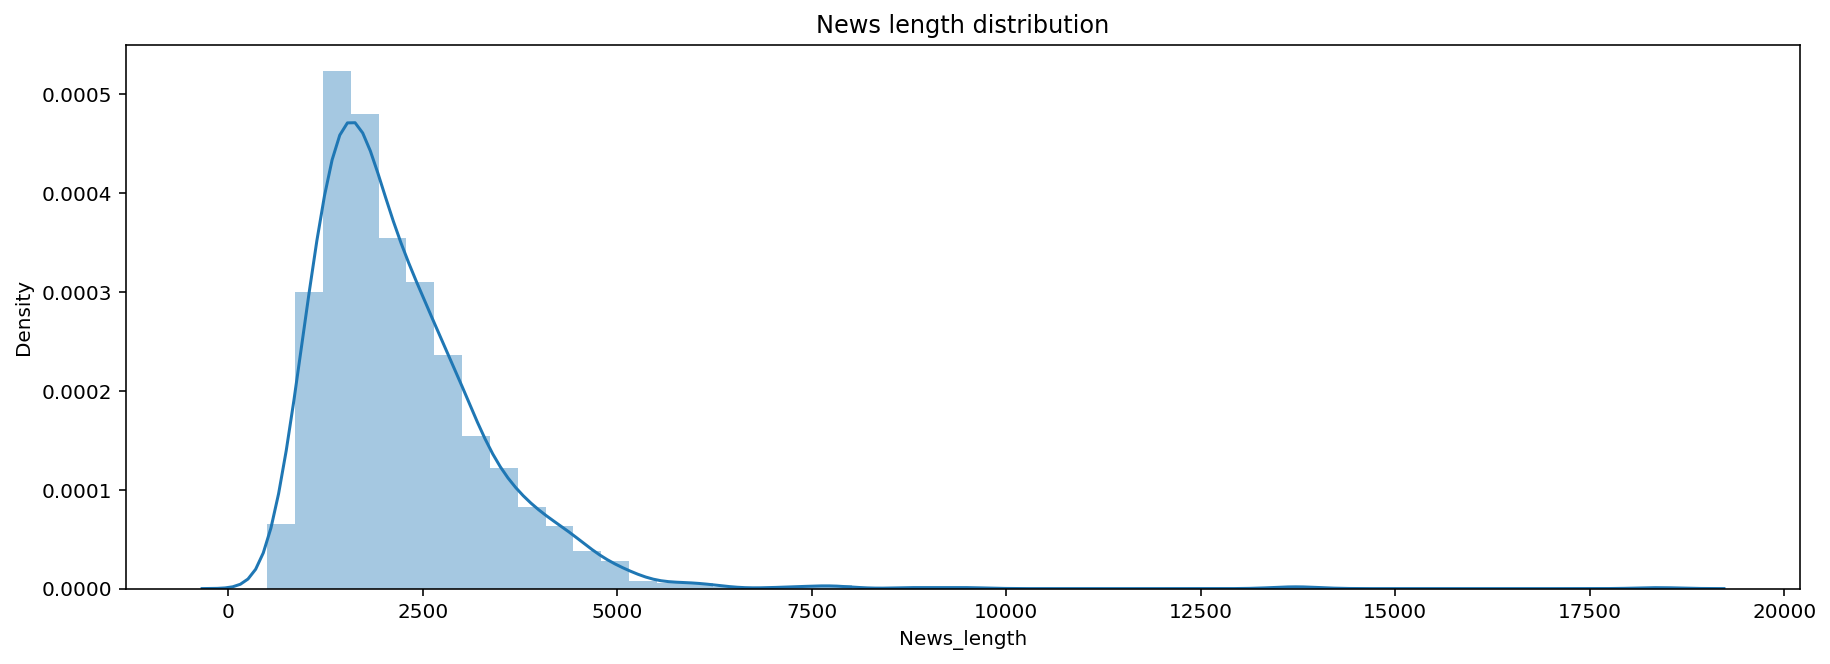

In [9]:
plt.figure(figsize=(15, 5))
sns.distplot(df['News_length']).set_title('News length distribution');

## **REMOVING PUNCTUATION**

In [10]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [11]:
df['Text'] = df['Text'].apply(remove_punctuation)
df.head(10)

ArticleId                                               Text  \
0       1833  worldcom exboss launches defence lawyers defen...   
1        154  german business confidence slides german busin...   
2       1101  bbc poll indicates economic gloom citizens in ...   
3       1976  lifestyle  governs mobile choice  faster  bett...   
4        917  enron bosses in 168m payout eighteen former en...   
5       1582  howard  truanted to play snooker  conservative...   
6        651  wales silent on grand slam talk rhys williams ...   
7       1797  french honour for director parker british film...   
8       2034  car giant hit by mercedes slump a slump in pro...   
9       1866  fockers fuel festive film chart comedy meet th...   

        Category  News_length  
0       business         1866  
1       business         2016  
2       business         3104  
3           tech         3618  
4       business         2190  
5       politics         1588  
6          sport         1988  
7  entertainment         1342  
8       business         2609  
9  entertainment         1368

# *REMOVING STOP WORDS*

In [12]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
sw = stopwords[:]

In [14]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [15]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [16]:
df['Text'] = df['Text'].apply(stopwords)
df.head(10)

ArticleId                                               Text  \
0       1833  worldcom exboss launches defence lawyers defen...   
1        154  german business confidence slides german busin...   
2       1101  bbc poll indicates economic gloom citizens maj...   
3       1976  lifestyle governs mobile choice faster better ...   
4        917  enron bosses 168m payout eighteen former enron...   
5       1582  howard truanted play snooker conservative lead...   
6        651  wales silent grand slam talk rhys williams say...   
7       1797  french honour director parker british film dir...   
8       2034  car giant hit mercedes slump slump profitabili...   
9       1866  fockers fuel festive film chart comedy meet fo...   

        Category  News_length  
0       business         1866  
1       business         2016  
2       business         3104  
3           tech         3618  
4       business         2190  
5       politics         1588  
6          sport         1988  
7  entertainment         1342  
8       business         2609  
9  entertainment         1368

# COLLECTING VOCABULARY COUNT

In [17]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['Text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [18]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

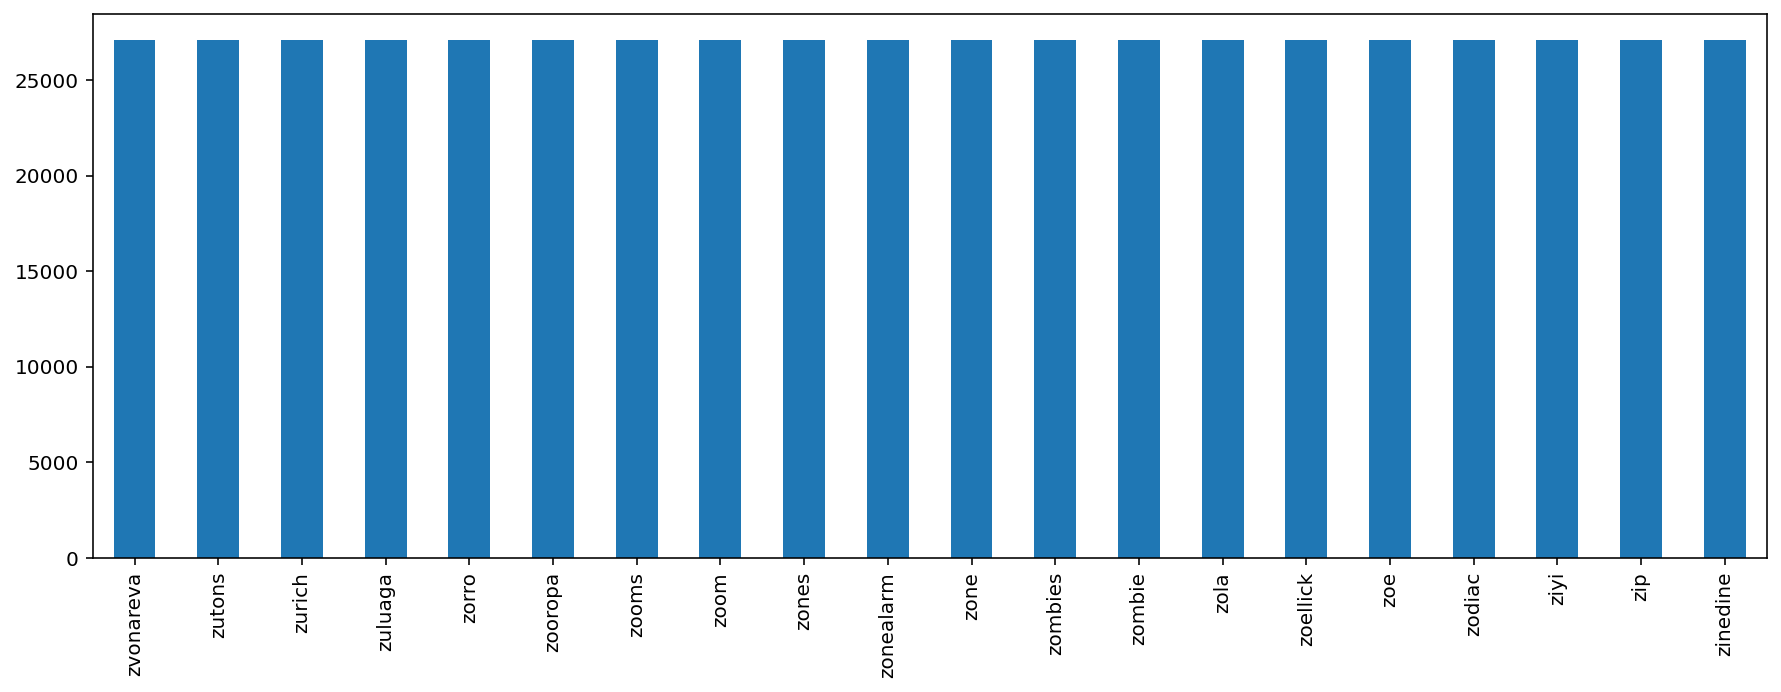

In [19]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# STEMMING

In [20]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [21]:
df['Text'] = df['Text'].apply(stemming)
df.head(10)

ArticleId                                               Text  \
0       1833  worldcom exboss launch defenc lawyer defend fo...   
1        154  german busi confid slide german busi confid fe...   
2       1101  bbc poll indic econom gloom citizen major nati...   
3       1976  lifestyl govern mobil choic faster better funk...   
4        917  enron boss 168m payout eighteen former enron d...   
5       1582  howard truant play snooker conserv leader mich...   
6        651  wale silent grand slam talk rhys william say w...   
7       1797  french honour director parker british film dir...   
8       2034  car giant hit merced slump slump profit luxuri...   
9       1866  focker fuel festiv film chart comedi meet fock...   

        Category  News_length  
0       business         1866  
1       business         2016  
2       business         3104  
3           tech         3618  
4       business         2190  
5       politics         1588  
6          sport         1988  
7  entertainment         1342  
8       business         2609  
9  entertainment         1368

In [22]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['Text'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

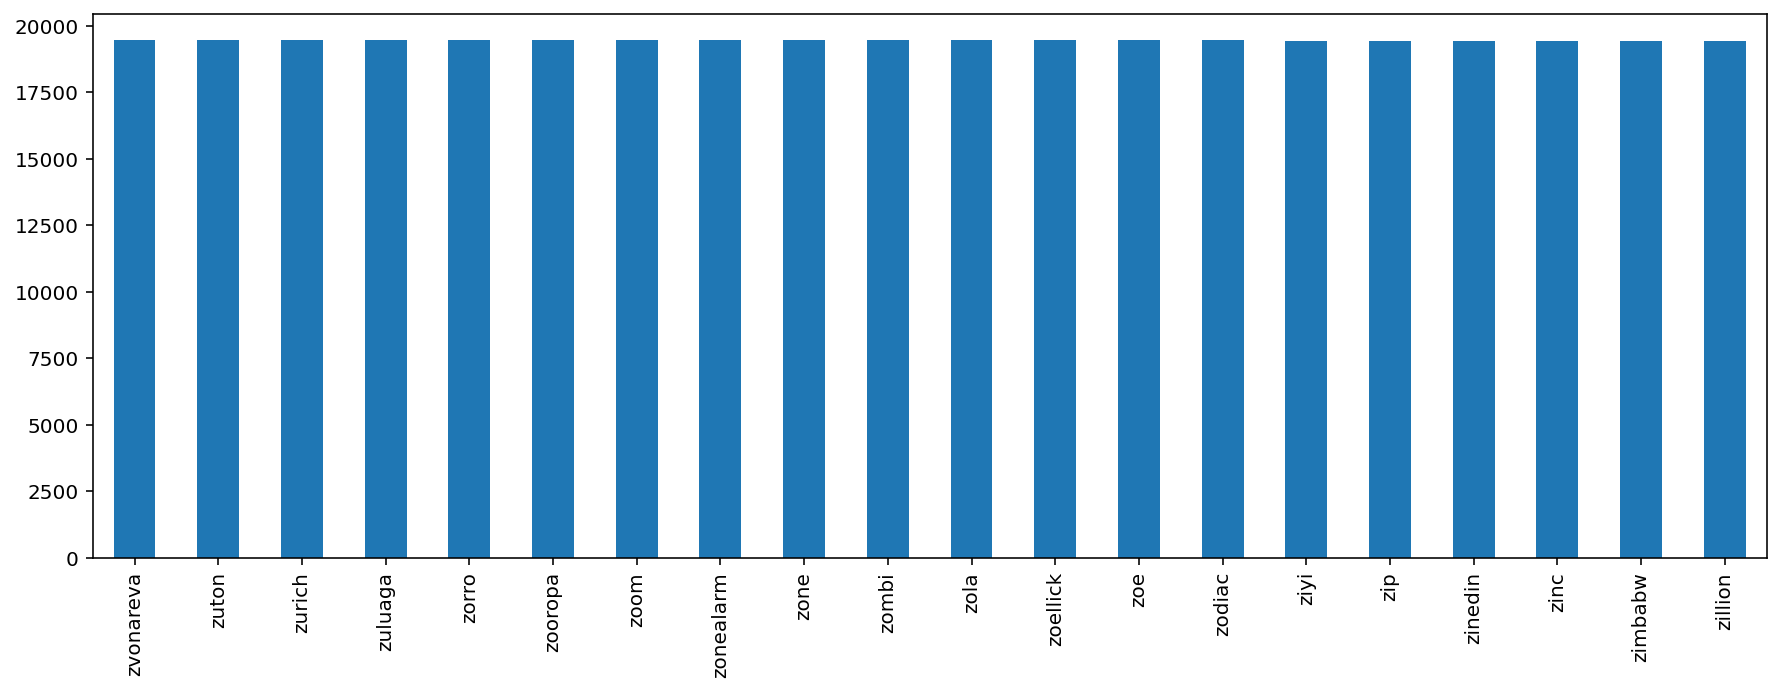

In [23]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

In [24]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [25]:
df['length'] = df['Text'].apply(length)
df.head(10)

ArticleId                                               Text  \
0       1833  worldcom exboss launch defenc lawyer defend fo...   
1        154  german busi confid slide german busi confid fe...   
2       1101  bbc poll indic econom gloom citizen major nati...   
3       1976  lifestyl govern mobil choic faster better funk...   
4        917  enron boss 168m payout eighteen former enron d...   
5       1582  howard truant play snooker conserv leader mich...   
6        651  wale silent grand slam talk rhys william say w...   
7       1797  french honour director parker british film dir...   
8       2034  car giant hit merced slump slump profit luxuri...   
9       1866  focker fuel festiv film chart comedi meet fock...   

        Category  News_length  length  
0       business         1866    1230  
1       business         2016    1310  
2       business         3104    1841  
3           tech         3618    2138  
4       business         2190    1384  
5       politics         1588     989  
6          sport         1988    1174  
7  entertainment         1342     845  
8       business         2609    1757  
9  entertainment         1368     924

In [26]:
Business_data = df[df['Category'] == 'business']
Entertainment_data = df[df['Category'] == 'entertainment']
Politics_data = df[df['Category'] == 'politics']
Sport_data = df[df['Category'] == 'sport']
Tech_data = df[df['Category'] == 'tech']

In [27]:
Business_data

ArticleId                                               Text  Category  \
0          1833  worldcom exboss launch defenc lawyer defend fo...  business   
1           154  german busi confid slide german busi confid fe...  business   
2          1101  bbc poll indic econom gloom citizen major nati...  business   
4           917  enron boss 168m payout eighteen former enron d...  business   
8          2034  car giant hit merced slump slump profit luxuri...  business   
...         ...                                                ...       ...   
1474       1257  indi buy india paper irish publish group indep...  business   
1479       2058  high fuel cost hit us airlin two largest airli...  business   
1480       1124  qanta see profit fli record australian airlin ...  business   
1484       1774  hyundai build new india plant south korea hyun...  business   
1487       1590  weak dollar hit reuter revenu media group reut...  business   

      News_length  length  
0            1866    1230  
1            2016    1310  
2            3104    1841  
4            2190    1384  
8            2609    1757  
...           ...     ...  
1474         1655    1031  
1479         1835    1221  
1480         1821    1209  
1484         1436     977  
1487         1370     882  

[336 rows x 5 columns]

# COUNT OF WORDS IN BUSINESS DATA

In [28]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Business_data['Text'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

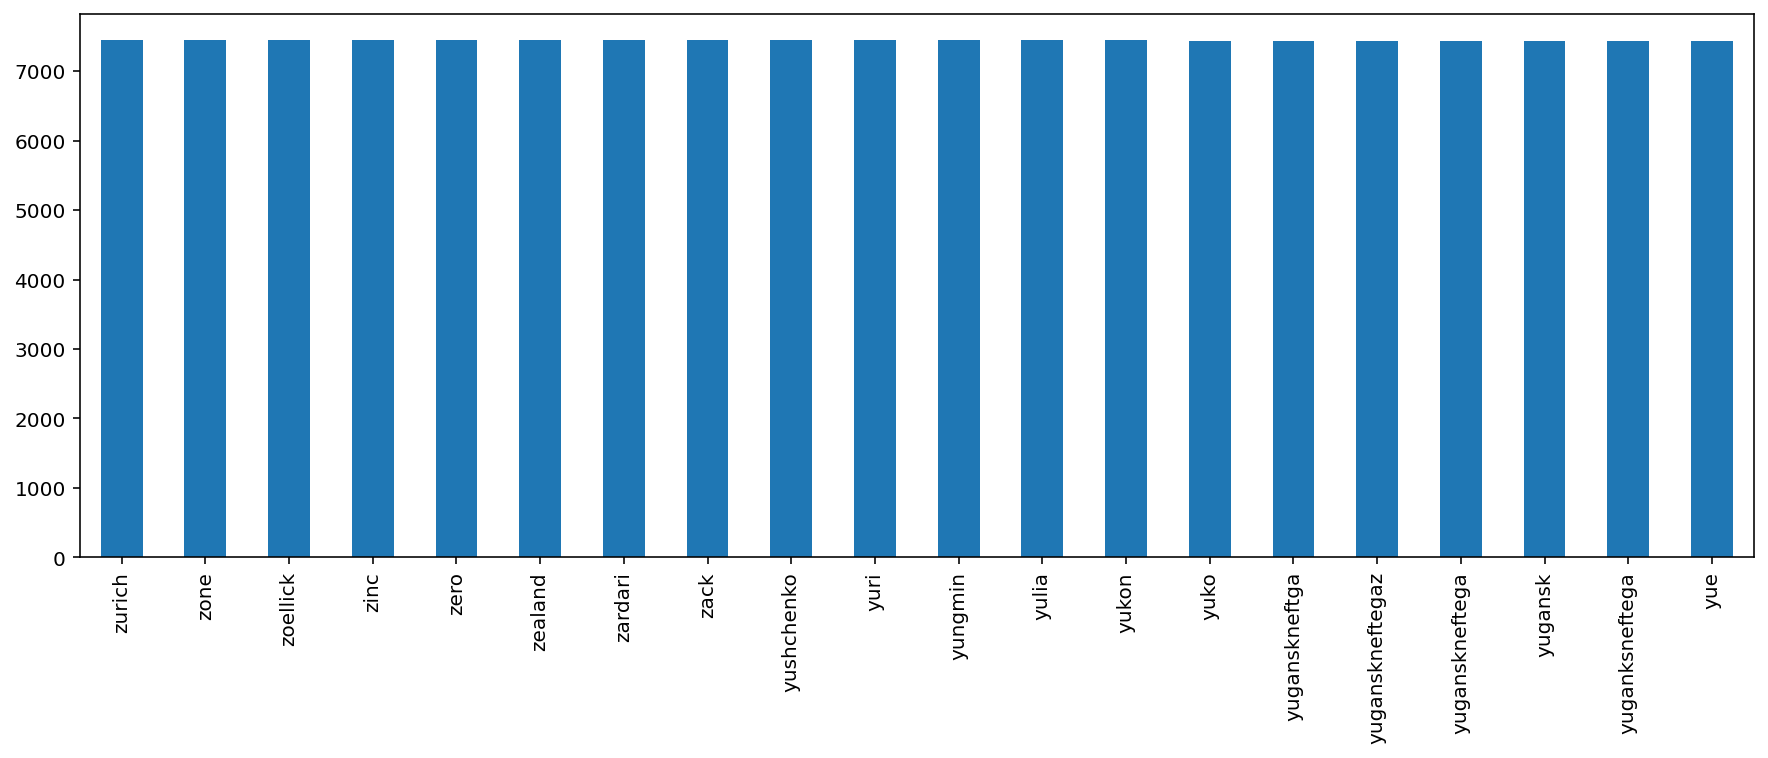

In [29]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# COUNT OF WORDS IN ENTERTAINMENT DATA

In [30]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Entertainment_data['Text'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

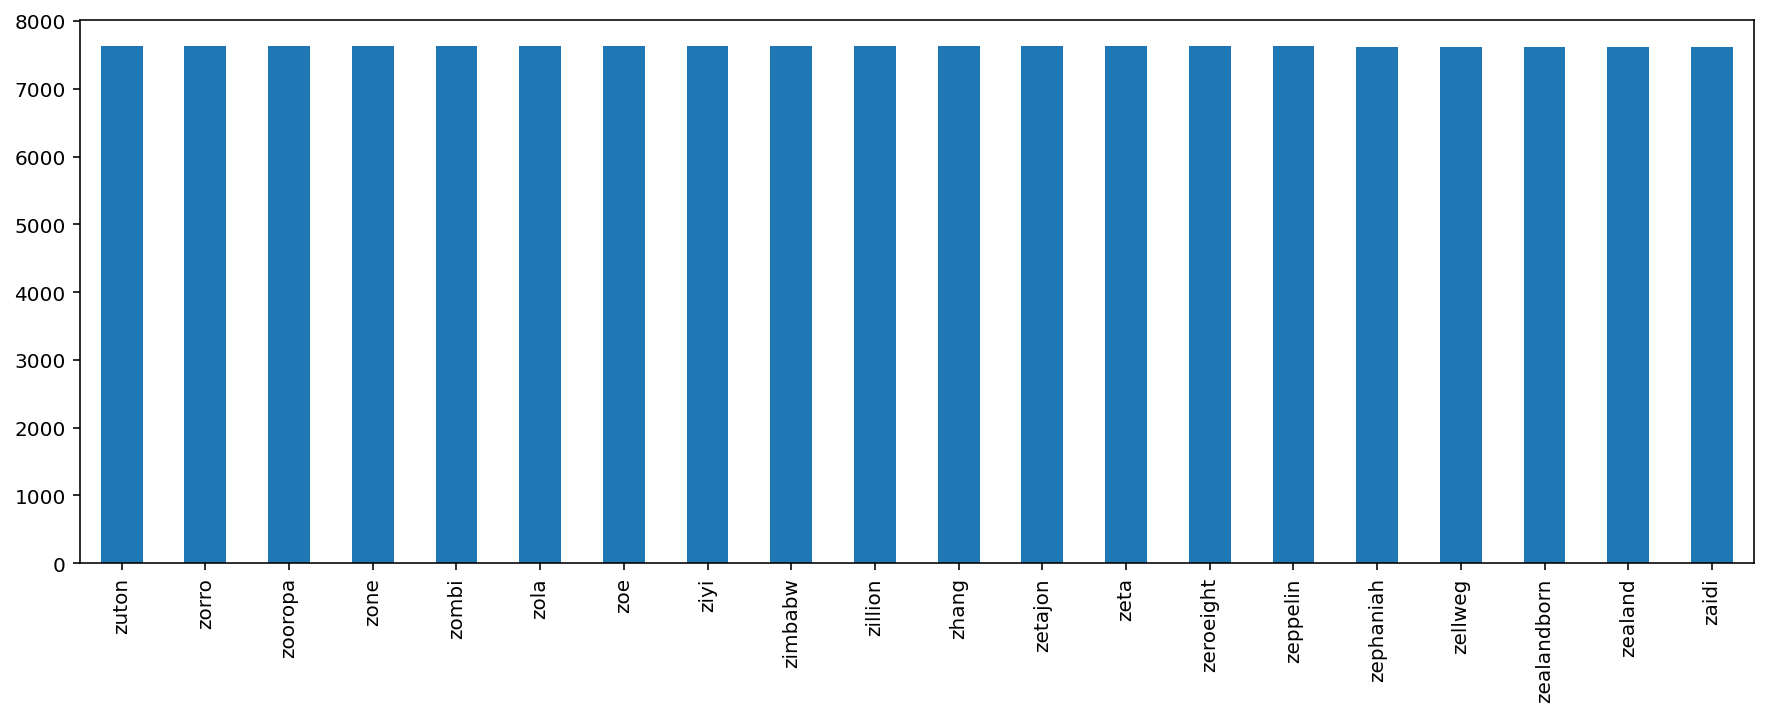

In [31]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# COUNT OF WORDS IN POLITICS DATA

In [32]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Politics_data['Text'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

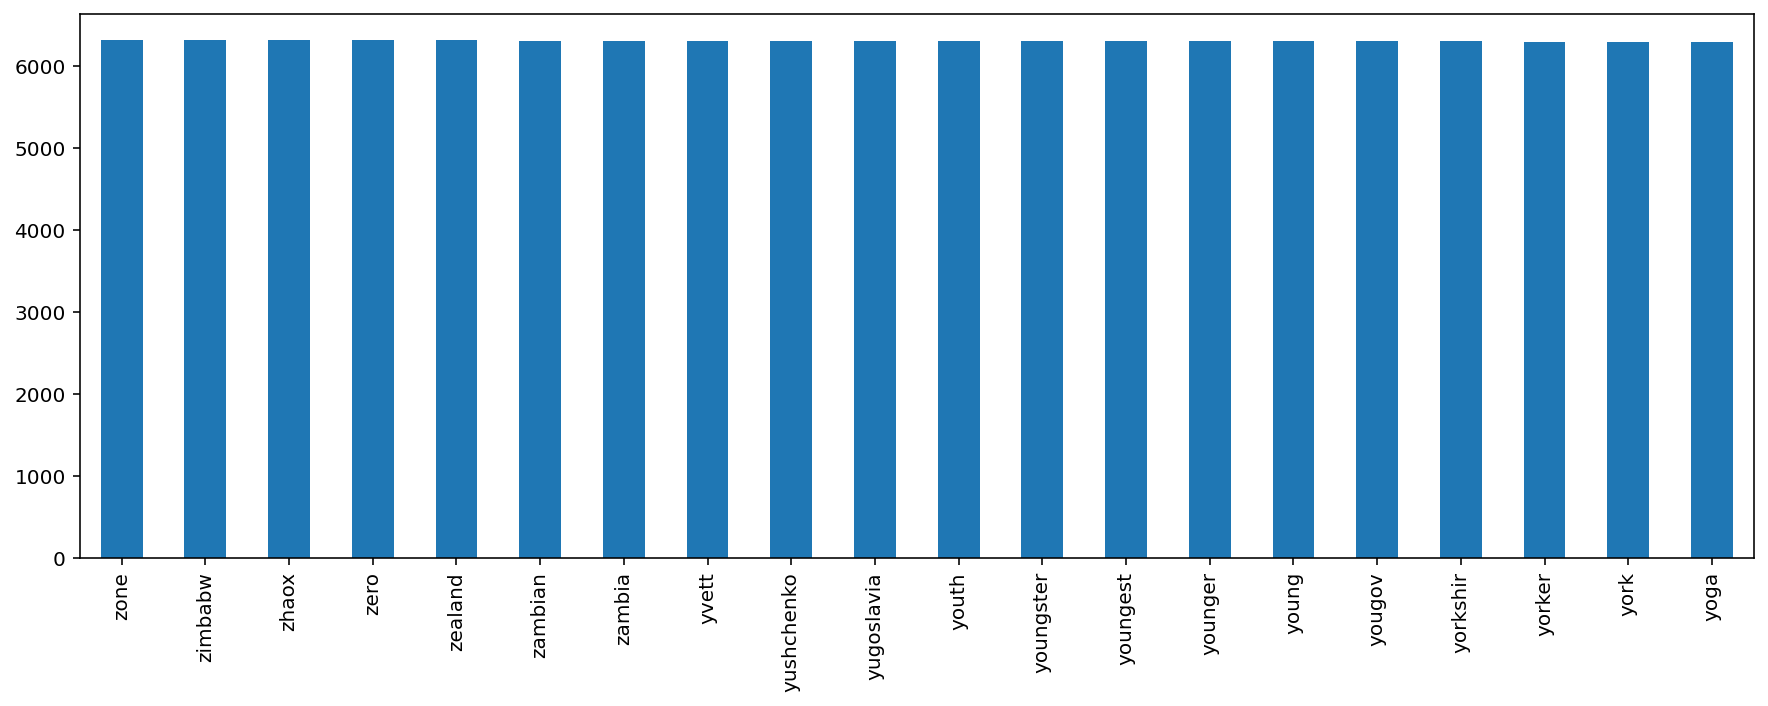

In [33]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# bold text COUNT OF WORDS IN SPORTS DATA

In [34]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Sport_data['Text'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

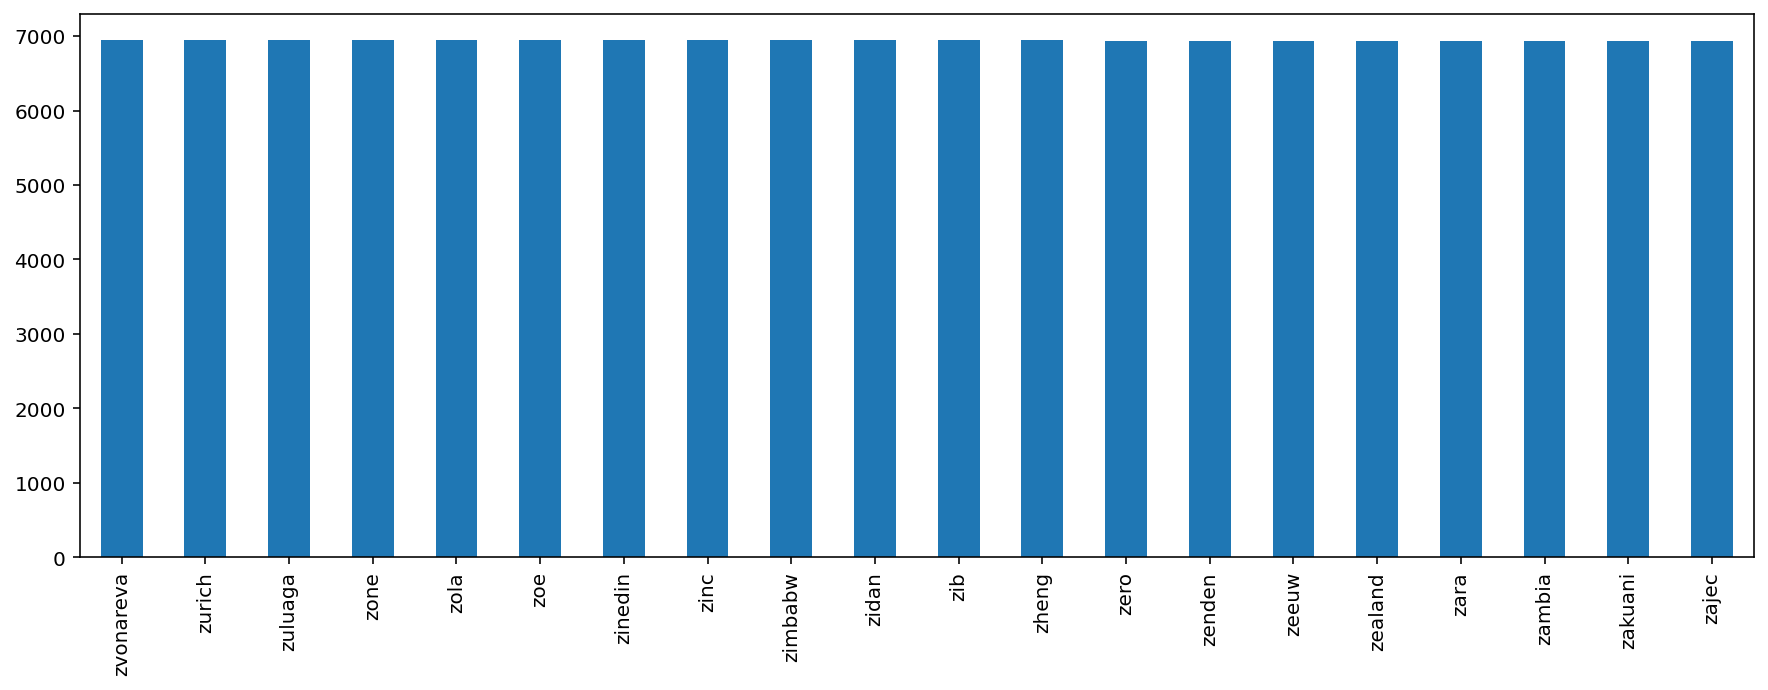

In [35]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# COUNT OF WORDS IN TECH DATA

In [36]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Tech_data['Text'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

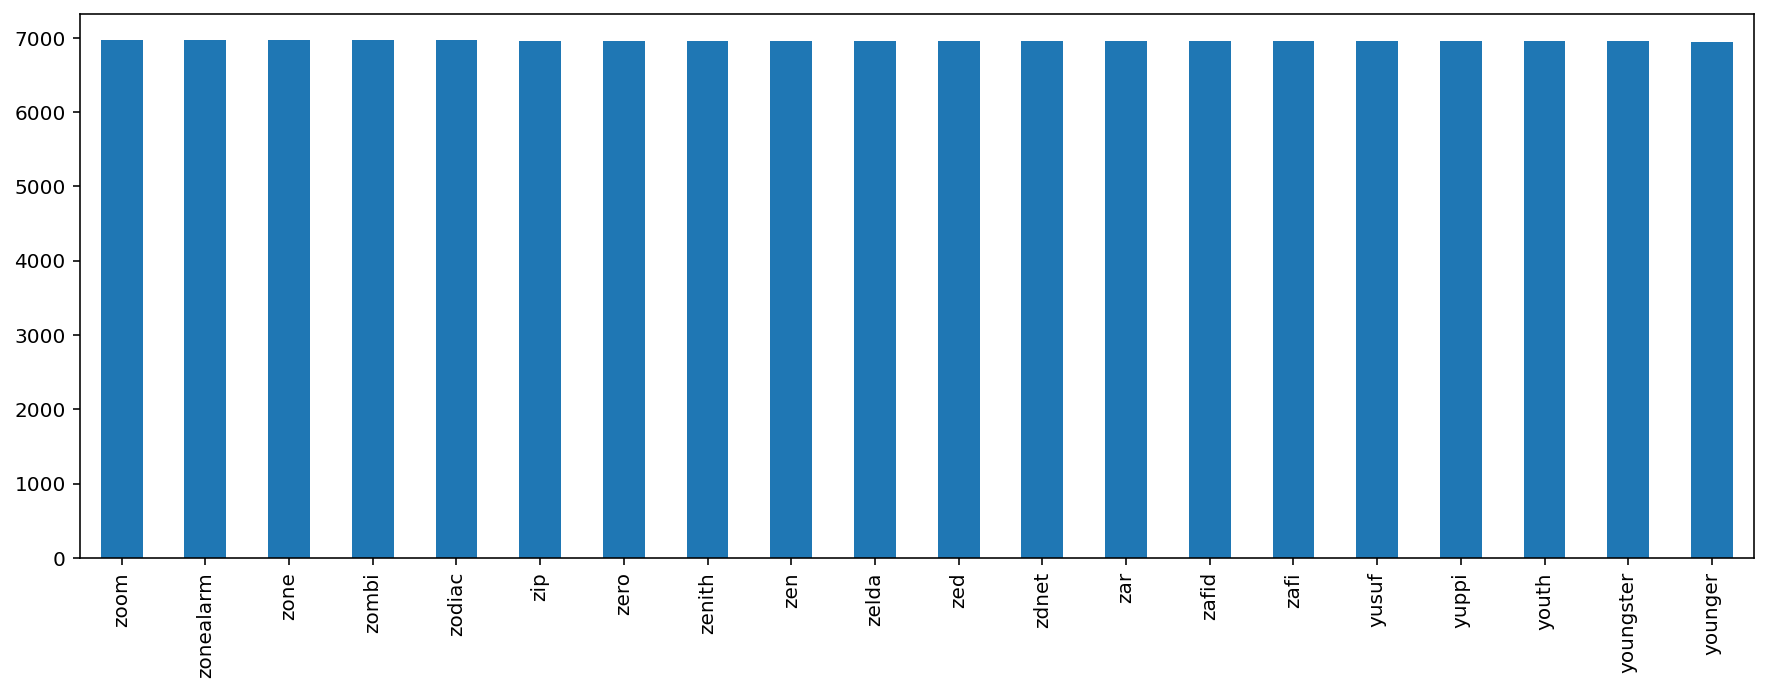

In [37]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# WORD CLOUD

In [38]:
from wordcloud import WordCloud ,STOPWORDS

In [39]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

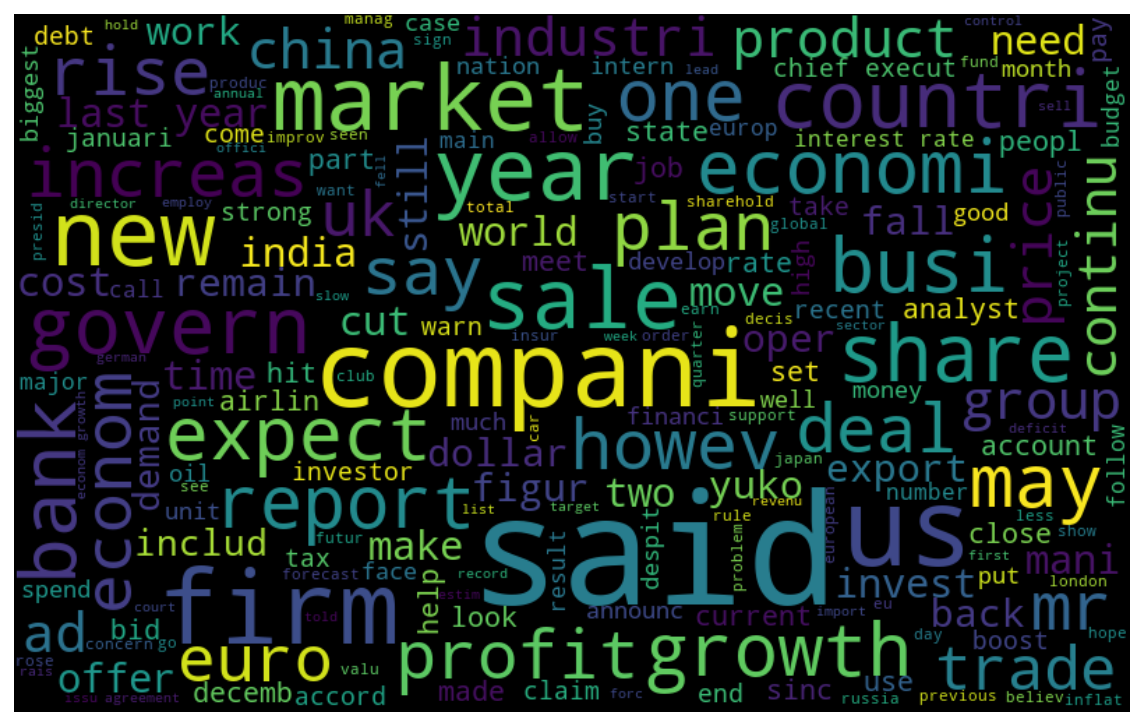

In [40]:
subset=df[df.Category=="business"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

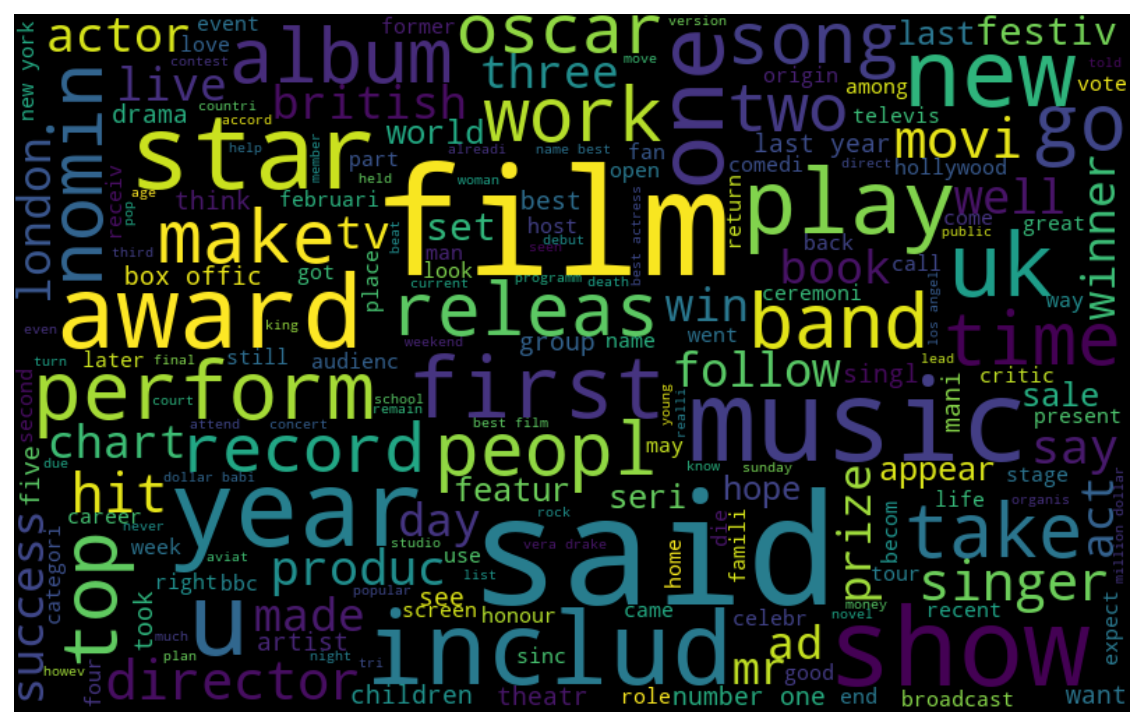

In [41]:
subset=df[df.Category=="entertainment"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

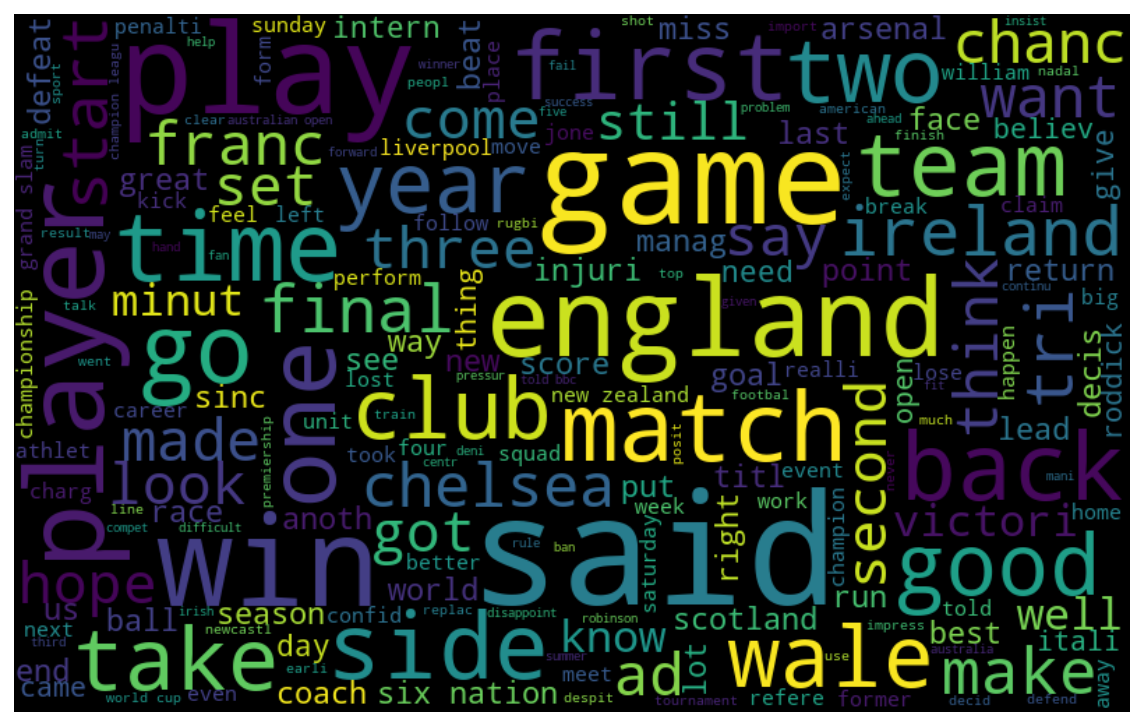

In [42]:
subset=df[df.Category=="sport"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

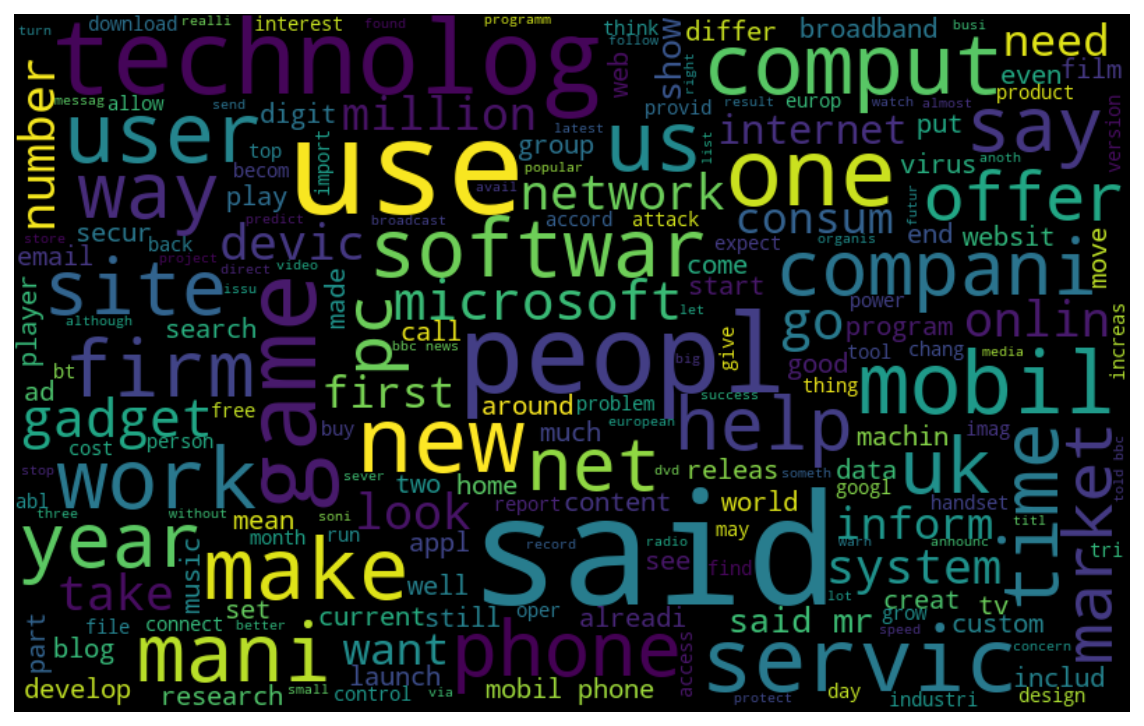

In [43]:
subset=df[df.Category=="tech"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

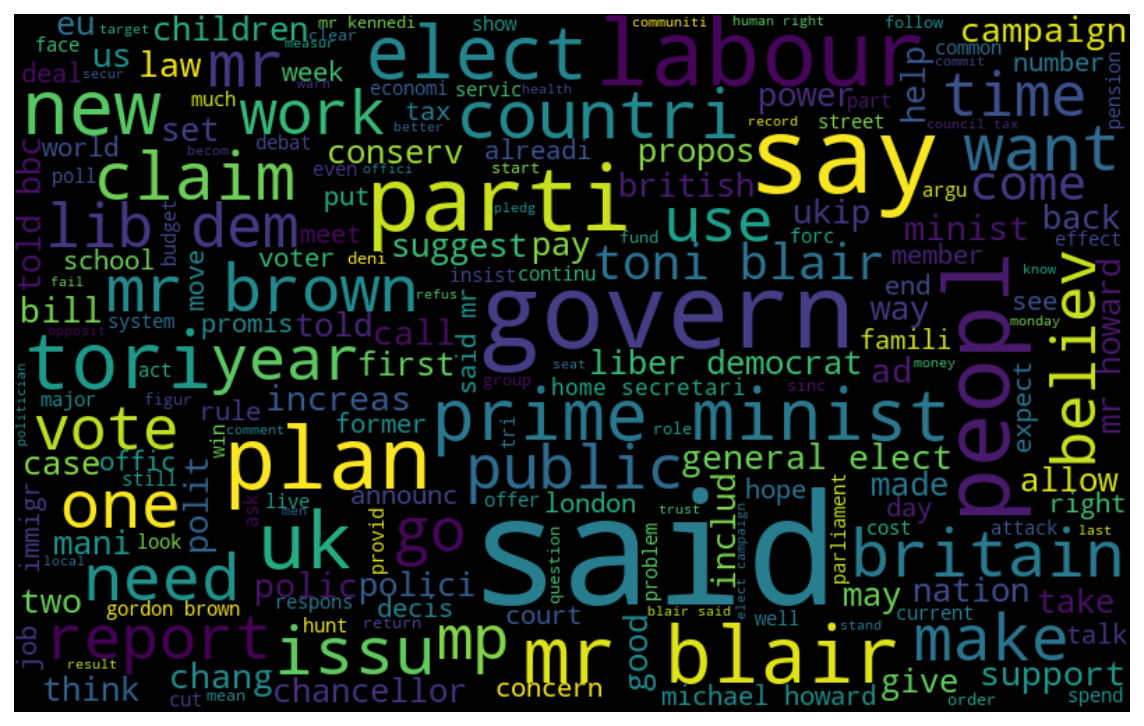

In [44]:
subset=df[df.Category=="politics"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

# LABEL ENCODING

In [45]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Category']= label_encoder.fit_transform(df['Category'])

In [46]:
df.head()

ArticleId                                               Text  Category  \
0       1833  worldcom exboss launch defenc lawyer defend fo...         0   
1        154  german busi confid slide german busi confid fe...         0   
2       1101  bbc poll indic econom gloom citizen major nati...         0   
3       1976  lifestyl govern mobil choic faster better funk...         4   
4        917  enron boss 168m payout eighteen former enron d...         0   

   News_length  length  
0         1866    1230  
1         2016    1310  
2         3104    1841  
3         3618    2138  
4         2190    1384

In [48]:
df.drop(["News_length","length","ArticleId"],axis=1,inplace=True)

In [49]:
df.head()

Text  Category
0  worldcom exboss launch defenc lawyer defend fo...         0
1  german busi confid slide german busi confid fe...         0
2  bbc poll indic econom gloom citizen major nati...         0
3  lifestyl govern mobil choic faster better funk...         4
4  enron boss 168m payout eighteen former enron d...         0

# TRAIN TEST SPLIT

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], 
                                                    df['Category'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [52]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [53]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.08185909 0.         0.         ... 0.         0.09810695 0.02914847]
 [0.05355955 0.         0.         ... 0.09903971 0.07406701 0.06776613]
 [0.         0.         0.0948152  ... 0.         0.         0.11528047]
 ...
 [0.11564232 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.06976536 ... 0.         0.         0.03554624]]
(298, 300)


# PREDICTION USING DIFFERENT MODEL

In [54]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9295302013422819
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.91      0.95        47
           2       0.92      0.85      0.89        55
           3       0.96      0.98      0.97        65
           4       0.88      0.96      0.92        55

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9463087248322147
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        76
           1       0.98      0.98      0.98        47
           2       0.94      0.87      0.91        55
           3       0.97      0.98      0.98        65
           4       0.90      0.98      0.94        55

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



In [56]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9295302013422819
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        76
           1       0.98      0.89      0.93        47
           2       0.89      0.89      0.89        55
           3       0.97      0.97      0.97        65
           4       0.86      1.00      0.92        55

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8187919463087249
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        76
           1       0.89      0.85      0.87        47
           2       0.74      0.73      0.73        55
           3       0.89      0.89      0.89        65
           4       0.81      0.87      0.84        55

    accuracy                           0.82       298
   macro avg       0.82      0.82      0.82       298
weighted avg       0.82      0.82      0.82       298



In [58]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8959731543624161
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        76
           1       0.91      0.83      0.87        47
           2       0.92      0.84      0.88        55
           3       0.96      0.98      0.97        65
           4       0.82      0.91      0.86        55

    accuracy                           0.90       298
   macro avg       0.90      0.89      0.89       298
weighted avg       0.90      0.90      0.90       298



# **CONCLUSION**

The news is almost every second used in different sources of media in soft and hard.

Due to impact of social media everyone is referring to online news platform. News classification became important aspect.

We get maximum accuracy with KNN classifier and Logistic regression with train and test accuracy as 0.96,0.95 and 0.98,0.95 respectively.

As per the working of KNN classifier we would like implement it on News classification